<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222313 entries, 0 to 222312
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      222313 non-null  float64
 1   energy            222313 non-null  float64
 2   key               222313 non-null  int64  
 3   loudness          222313 non-null  float64
 4   mode              222313 non-null  int64  
 5   speechiness       222313 non-null  float64
 6   acousticness      222313 non-null  float64
 7   instrumentalness  222313 non-null  float64
 8   liveness          222313 non-null  float64
 9   valence           222313 non-null  float64
 10  tempo             222313 non-null  float64
 11  type              222313 non-null  object 
 12  id                222313 non-null  object 
 13  uri               222313 non-null  object 
 14  track_href        222313 non-null  object 
 15  analysis_url      222313 non-null  object 
 16  duration_ms       22

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.457822,0.308414,-1.187239,0.009805,0.787163,-0.391332,1.191884,-0.627617,1.092214,1.515025,-0.503410
1,-0.408076,-0.609575,1.029808,-0.103078,-1.270385,-0.540643,1.324135,-0.625991,0.192504,0.984287,-0.414648
2,-0.314110,-0.004353,-0.078715,0.059560,0.787163,0.937847,1.511747,-0.627653,-0.364460,1.336792,-0.331497
3,-0.911069,-1.097003,-0.632977,-0.487941,0.787163,-0.539874,1.314908,-0.627653,0.202025,0.283238,0.557273
4,0.371287,0.129690,1.306939,-0.247033,0.787163,0.160504,1.142675,-0.627653,-0.710538,1.154598,-0.715445


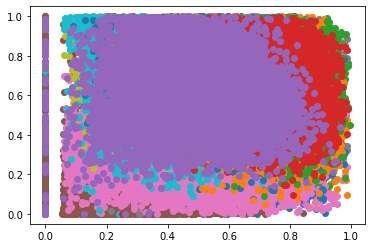

In [2]:
import subroutine_webscraping
import subroutine_kmeans

# Recommender App by Tobias

In [3]:
user_input = input("Your choice: ")
user_input_low = user_input.lower()
track_name_iterator = filter(lambda x: user_input_low in x, df['title_artist'])
filtered_songs = sorted(list(track_name_iterator))

# More than 1 song left after filtering --> build a selection
if len(filtered_songs) > 1:
    # Deal with more than one song.
    print('There are more than one song containing "{0}"'.format(user_input))
    print('Select the song from choices: ')
    for index, name in enumerate(filtered_songs):
        print("{0}: {1}".format(index, name))
        
# Ask for a choice from the list
    index = int(input("Enter choice number: "))
    # IndexErrorException needed in case a non-number is chosen or a number outside of index.
    song_cluster = (df['cluster'][df['title_artist'] == filtered_songs[index]]).values[0]
    song_id = (df['id'][df['title_artist'] == filtered_songs[index]]).values[0]
    suggestion = (df['title_artist'][df['cluster'] == song_cluster]).sample(n=1).values[0]
    suggestion_id = (df['id'][df['title_artist'] == suggestion]).values[0]
    print('\nSelected song: {0}'.format(filtered_songs[index]))
 
    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))
    print('\nYou might also like:\n' + suggestion)
    display(IFrame(src=f"https://open.spotify.com/embed/track/{suggestion_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))
    
#    print('\nYou might also like:\n' + df['title_artist'].sample(n=1).values[0])

# If there's only one song after filtering    
elif len(filtered_songs) == 1:
    # Only one song found, so print that song.
    song_cluster = (df['cluster'][df['title_artist'] == filtered_songs[0]]).values[0]
    song_id = (df['id'][df['title_artist'] == filtered_songs[0]]).values[0]
    suggestion = (df['title_artist'][df['cluster'] == song_cluster]).sample(n=1).values[0]
    suggestion_id = (df['id'][df['title_artist'] == suggestion]).values[0]
    print(('\nSelected song: {0}'.format(filtered_songs[0])))
    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))
    print('\nYou might also like:\n' + suggestion)
    display(IFrame(src=f"https://open.spotify.com/embed/track/{suggestion_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))
else:
    print('Unfortunately, there is no song containing "{0}" in the list!'.format(user_input))


Your choice: rapsody


NameError: name 'df' is not defined